In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

In [2]:
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

In [3]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
y = np.where(y == 1 ,1, -1)

In [49]:
class Perceptron(object):
    
    def __init__(self, eta = 0.05 , factor = 0.1, patience = 60, epochs =  100):
        self.eta = eta
        self.factor = factor
        self.patience = patience
        self.epochs = epochs
        
    def fit(self,X,y):
        self.w_ = np.random.randn(1 + X.shape[1])
        self.error_ = []
        start = time.time()
        self.acc_ = []
        
        for epoch in range(1,self.epochs+1):
            print(f'epoch:{epoch} ...')
            
            if epoch%self.patience == 0:
                self.eta = self.eta * self.factor
                print('learning rate is updated')
                
            print(f'learning rate: {self.eta}')    
            
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
            acc = accuracy_score(y,self.predict(X))
            self.acc_.append(acc)
        print(f'estimated coefs: {self.w_}')
        pred = self.predict(X)
        acc =accuracy_score(y, pred)
        print('acc score: {:.4}%'.format(acc*100))
        print('estimation time {}'.format(time.time()-start))
        return self
    
                
    def net_pred(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        return np.where(self.net_pred(X)>0 , 1, -1)
                
            

In [63]:
model = Perceptron(eta = 0.05, factor = 0.5, patience= 250, epochs = 1000).fit(X,y)

epoch:1 ...
learning rate: 0.05
epoch:2 ...
learning rate: 0.05
epoch:3 ...
learning rate: 0.05
epoch:4 ...
learning rate: 0.05
epoch:5 ...
learning rate: 0.05
epoch:6 ...
learning rate: 0.05
epoch:7 ...
learning rate: 0.05
epoch:8 ...
learning rate: 0.05
epoch:9 ...
learning rate: 0.05
epoch:10 ...
learning rate: 0.05
epoch:11 ...
learning rate: 0.05
epoch:12 ...
learning rate: 0.05
epoch:13 ...
learning rate: 0.05
epoch:14 ...
learning rate: 0.05
epoch:15 ...
learning rate: 0.05
epoch:16 ...
learning rate: 0.05
epoch:17 ...
learning rate: 0.05
epoch:18 ...
learning rate: 0.05
epoch:19 ...
learning rate: 0.05
epoch:20 ...
learning rate: 0.05
epoch:21 ...
learning rate: 0.05
epoch:22 ...
learning rate: 0.05
epoch:23 ...
learning rate: 0.05
epoch:24 ...
learning rate: 0.05
epoch:25 ...
learning rate: 0.05
epoch:26 ...
learning rate: 0.05
epoch:27 ...
learning rate: 0.05
epoch:28 ...
learning rate: 0.05
epoch:29 ...
learning rate: 0.05
epoch:30 ...
learning rate: 0.05
epoch:31 ...
learni

Text(1000, 0.58, '0.58')

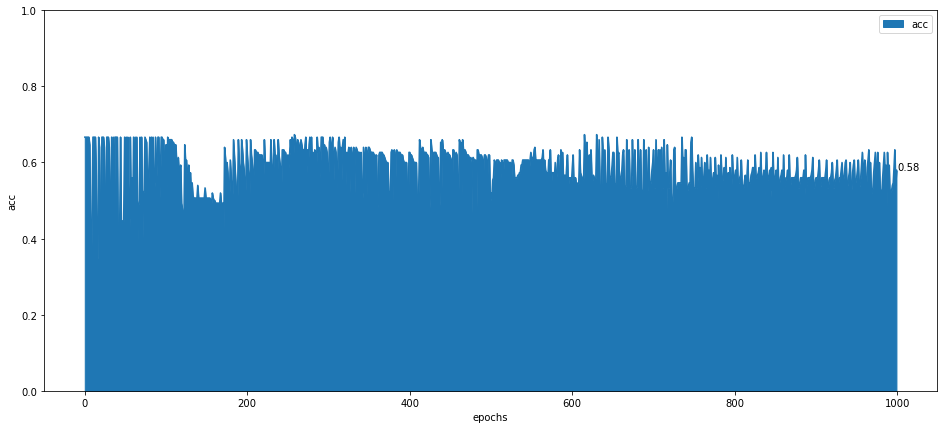

In [64]:
pd.DataFrame(model.acc_, columns= ['acc']).plot(kind = 'area',
                                              figsize = (16,7));
plt.ylim(0,1);
plt.ylabel('acc');
plt.xlabel('epochs');
plt.annotate(xy = [model.epochs,model.acc_[-1]], s = '{}'.format(model.acc_[-1]))